# Most Environmentally Friendly Pittsburgh Neighborhood

In [7]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
plt.style.use('seaborn') #set plot style so stuff looks nice

## Trees

In [2]:
treeData = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
treeData.head()

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


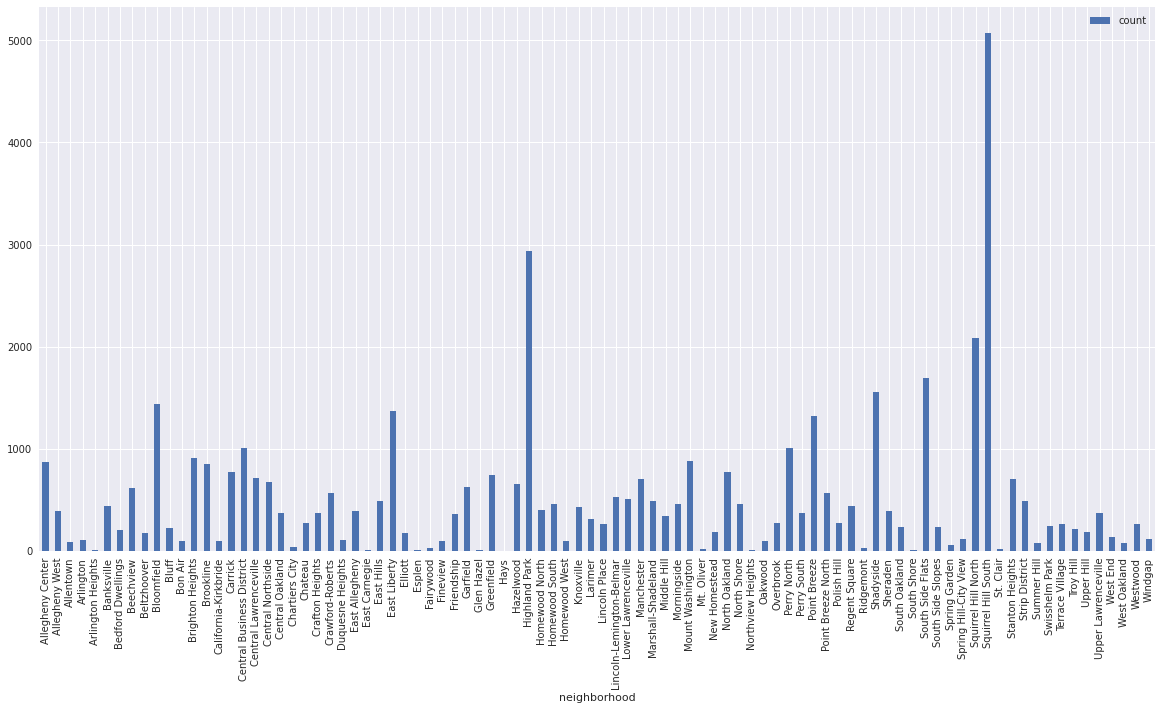

In [6]:
#to_frame and reset_index turn it from a list indexed by neigborhood to a dataframe with two columns and numerical index
treeCounts = treeData.groupby("neighborhood")['id'].count().to_frame().reset_index()
treeCounts.columns = ["neighborhood", "count"] #count used to be id, i used it because all of them have one
treeCounts.plot(kind="bar", x="neighborhood", figsize=(20,10))

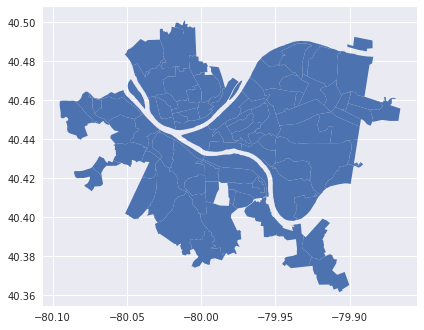

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

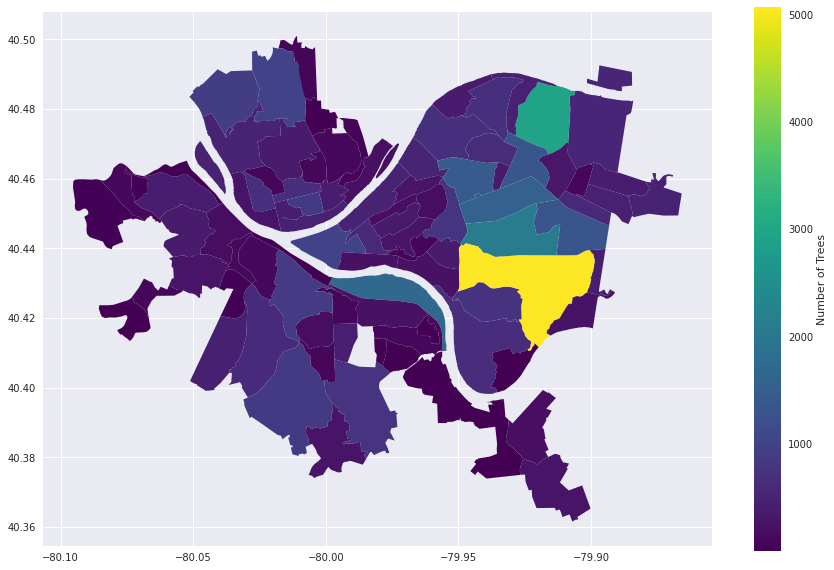

In [9]:
treeMap = neighborhoods.merge(treeCounts, how='left', left_on='hood', right_on='neighborhood')
treeMap.plot(column="count",
             cmap="viridis",
             legend=True, 
             figsize=(15,10),
             legend_kwds={'label': "Number of Trees"})

In [10]:
maxTrees = treeCounts.max()['count']
minTrees = treeCounts.min()['count']
treeScores = treeCounts['count'].map(lambda x : ((x - minTrees) / (maxTrees - minTrees)))
treeCounts['score'] = treeScores 
treeCounts.head()

,neighborhood,count,score
0,Allegheny Center,867,0.170741
1,Allegheny West,386,0.075907
2,Allentown,84,0.016364
3,Arlington,107,0.020899
4,Arlington Heights,5,0.000789


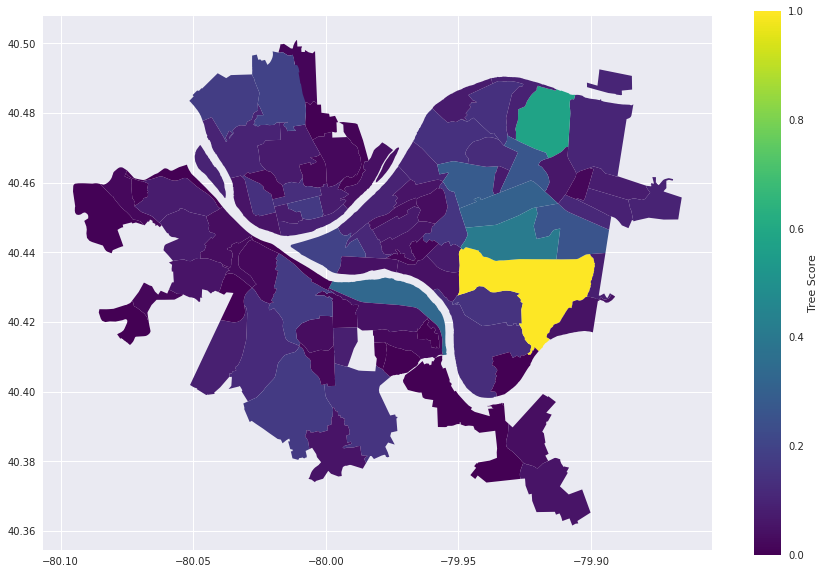

In [11]:
treeMap2 = neighborhoods.merge(treeCounts, how='left', left_on='hood', right_on='neighborhood')
treeMap2.plot(column="score",
             cmap="viridis",
             legend=True, 
             figsize=(15,10),
             legend_kwds={'label': "Tree Score"})

In [12]:
treeCounts.sort_values(by="count", ascending=False).head(10)

,neighborhood,count,score
76,Squirrel Hill South,5073,1.000000
39,Highland Park,2941,0.579653
75,Squirrel Hill North,2083,0.410489
71,South Side Flats,1693,0.333596
67,Shadyside,1558,0.306979
9,Bloomfield,1436,0.282926
28,East Liberty,1366,0.269125
62,Point Breeze,1316,0.259267
60,Perry North,1007,0.198344
16,Central Business District,1002,0.197358


In [13]:
treeCounts.sort_values(by="count", ascending=True).head(10)

,neighborhood,count,score
37,Hays,1,0.000000
70,South Shore,2,0.000197
35,Glen Hazel,2,0.000197
30,Esplen,3,0.000394
4,Arlington Heights,5,0.000789
57,Northview Heights,6,0.000986
26,East Carnegie,8,0.001380
77,St. Clair,12,0.002169
53,Mt. Oliver,13,0.002366
66,Ridgemont,31,0.005915


## Waste Recovery Locations

This code below sets up the data so it can be used by Pandas. The data used in here is the location of all the waste recovery locations in Allegheny county. Because our overall metric to determine the "best" neighborhood is by measuring the environmental cleanliness of each neighborhood, the more waste recovery locations available, the more likely that the neighborhood is to be clean and free of litter. 

In [14]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/51f0c4f3-0ddd-4073-8f39-ad19d7528575")

This code below filters out the the waste locations that have no location associated with them because without the neighborhood designation, the data is useless to us. I then just displayed the first 10 locations within the list.

In [15]:
data_filtered = data[data['neighborhood'].notnull()]
data_filtered.head(10)

,id,name,address_number,street,city,hours_of_operation,notes,phone_number,website,managed_by_city,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
2,2029078673,Advance Auto Parts - East Liberty,5905.0,Station St,Pittsburgh,7:30 a.m. - 9:00 p.m. Monday - Saturday 9:00 a...,NaN,412-661-7050,https://shop.advanceautoparts.com/o/storeservi...,f,...,East Liberty,9.0,11.0,42003111500,2.0,11.0,5.0,3-8,40.464459,-79.924964
4,1160745337,Allegheny County Health Department,3901.0,Penn Ave,Pittsburgh,"8:00 a.m. - 4:00 p.m., Monday - Friday",NaN,412-578-8390,NaN,f,...,Lower Lawrenceville,7.0,6.0,42003060300,2.0,6.0,2.0,3-3,40.465420,-79.959001
5,758154727,Appliance Warehouse,504.0,Bingham St,Pittsburgh,"9:00 a.m. - 5:00 p.m., Monday - Saturday",NaN,412-247-4460,NaN,f,...,South Side Flats,3.0,17.0,42003170200,3.0,17.0,3.0,4-2,40.429444,-79.994381
12,1276055567,CCI Center Drop Box,64.0,Sarah St,Pittsburgh,"8:30 a.m. - 5:00 p.m., Monday - Friday",Located in Lobby,412-488-7490,NaN,f,...,South Side Flats,3.0,17.0,42003170200,3.0,17.0,3.0,4-24,40.427840,-79.984331
13,363498631,City-County Building Drop Box,526.0,4th Ave,Pittsburgh,8:30 a.m. - 4:30 p.m.,Located in Lobby,NaN,NaN,t,...,Central Business District,6.0,1.0,42003020100,6.0,1.0,2.0,1-4,40.437980,-79.996931
14,852485030,Construction Junction,200.0,N Lexington Ave,Pittsburgh,"9:00 a.m. - 6:00 p.m., Monday - Friday 9:00 a....",Call or visit their webpage to confirm the req...,412-243-5025,https://www.cjreuse.org/donate/what-we-accept/,f,...,Point Breeze North,9.0,14.0,42003140500,2.0,14.0,4.0,3-14,40.449708,-79.897862
15,1876149639,Construction Junction Drop Off Partner Site,7235.0,Meade St,Pittsburgh,"9:00 a.m. - 6:00 p.m., Monday - Friday 9:00 a....","Does NOT Accept Yard Debris, Scrap Metal or Tires",412-243-5025,NaN,t,...,Point Breeze North,9.0,14.0,42003140500,2.0,14.0,4.0,3-14,40.449635,-79.898908
17,1373153417,Evolution E-Cycling,2235.0,Mary St,Pittsburgh,"9:00 a.m. - 5:00 p.m., Monday - Friday",Fees May Apply,412-390-3450,http://www.evolutionecycling.com/services/elec...,f,...,South Side Flats,3.0,16.0,42003160900,3.0,16.0,3.0,4-24,40.425890,-79.973601
19,871457761,Giant Eagle - Greenfield,4239.0,Murray Ave,Pittsburgh,"6:00 a.m. - 12:00 a.m., Daily","Must be empty, clean and dry. Call to confirm ...",(412) 421-6472,NaN,f,...,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15,40.422020,-79.928909
20,416304083,Giant Eagle - Shadyhill Plaza,6320.0,Shakespeare St,Pittsburgh,"6:00 a.m. - 12:00 a.m., Daily","Must be empty, clean and dry. Call to confirm ...",(412) 361-6220,NaN,f,...,Shadyside,8.0,7.0,42003070800,2.0,7.0,4.0,3-13,40.458730,-79.921011


I then sorted the in descending order (so the highest value is on top) by count of waste recovery locations per neighborhood. I was suprised to see that South Side took first place for the most locations. I was also suprised to see how many neighborhoods either had 0 or only 1.

In [17]:
data_filtered['neighborhood'].value_counts().sort_values(ascending=False)

South Side Flats             6
Shadyside                    4
East Liberty                 3
Point Breeze North           3
Chateau                      2
Strip District               2
Lower Lawrenceville          1
Greenfield                   1
Elliott                      1
Upper Lawrenceville          1
Central Business District    1
Beltzhoover                  1
Homewood West                1
Squirrel Hill South          1
Central Northside            1
Hazelwood                    1
East Allegheny               1
Lincoln-Lemington-Belmar     1
Name: neighborhood, dtype: int64

This displays a simple bar graph with the neighborhoods on the x-axis and the count of the locations on the y-axis, in no particular order

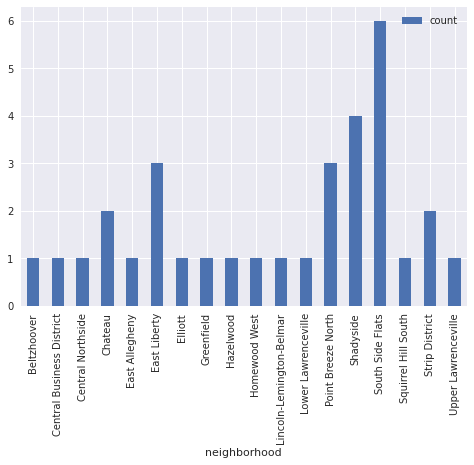

In [18]:
data_filtered_count = data_filtered.groupby("neighborhood")['id'].count().to_frame().reset_index()
data_filtered_count.columns = ["neighborhood", "count"]
data_filtered_count.plot(kind = "bar", x = "neighborhood")

This displays a map of Allegheny county with a color gradient to represent the number of waste recovery locations per county. The light grey areas are the areas that have no waste recovery location associated with them which as you can see is actually a lot more than I think most people would have expected.

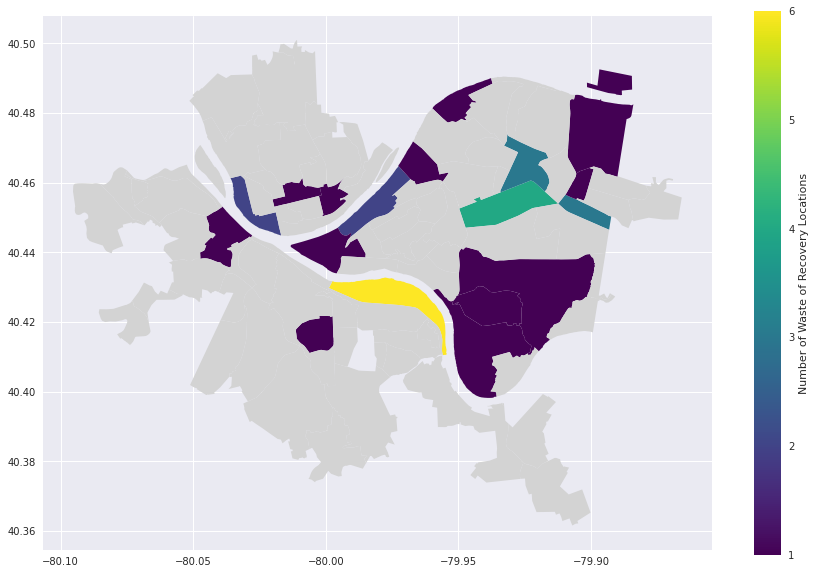

In [19]:
wasteMap = neighborhoods.merge(data_filtered_count, how = 'left', left_on = 'hood', right_on = 'neighborhood')
wasteMap.plot(column = "count",
             cmap = "viridis",
             legend = True,
             legend_kwds = {'label': "Number of Waste of Recovery Locations"},
             figsize = (15,10),
             missing_kwds = {"color": "lightgrey"})

This code below gives a relative score from 0 to 1 for each neighborhood so that way it can be used along with the other data sets to develop a total metric that determines the offical "best" or most environmental neighborhood in our case. The formula used to determine the score is a simple algorithim using the maximum and minimum values to calculate the score.

In [20]:
maxWaste = data_filtered_count.max()['count']
minWaste = 0
wasteScores = data_filtered_count['count'].map(lambda x : ((x - minWaste) / (maxWaste - minWaste)))
data_filtered_count['score'] = wasteScores
data_filtered_count.head()

,neighborhood,count,score
0,Beltzhoover,1,0.166667
1,Central Business District,1,0.166667
2,Central Northside,1,0.166667
3,Chateau,2,0.333333
4,East Allegheny,1,0.166667


This then displays a map of Allegheny county but this time rather than using the number of locations it uses the score for each neighborhood, but it still looks the same as the other map like it should because the relative differences between each neighborhood are still the same.

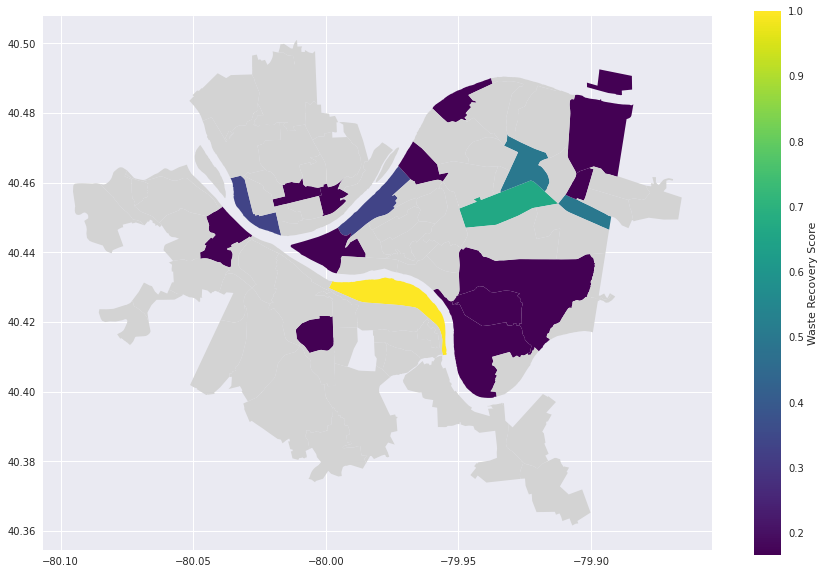

In [21]:
wasteMap = neighborhoods.merge(data_filtered_count, how = 'left', left_on = 'hood', right_on = 'neighborhood')
wasteMap.plot(column = "score",
             cmap = "viridis",
             legend = True,
             legend_kwds = {'label': "Waste Recovery Score"},
             figsize = (15,10),
             missing_kwds = {"color": "lightgrey"})

In conclusion , when looking at just the waste recovery locations in Allegheny county, it is very easy to see that the South Side neighborhood is the clear winner. With there being so a lot of people there and a hot spot to visit, it makes sense that there is a need for a lot of locations to recover waste. In general the East side of Allegheny county appears to have a significant amount more of locations than the west side and there doesn't seem to be a clear reason as to why this is the case. However though, with some places being a little less urban than others, it would make sense that there wouldn't be as much of a need for waste recovery locations and maybe some of the neighborhoods dump their waste in other ones that contain a lot more locations.

## Natural Environment Conditions: Park Space

When deciding which Pittsburgh neighborhood is the most environmentally friendly, it's important to know how many parks / natural spaces there are. We're going to look at a data set that includes the park space, in acres, per 1000 people in each neighborhood.

In [22]:
natural_data = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/14501cb9-308d-49ce-8bbb-7933ad703fe1/download/natural-environment-conditions.csv")

#### Let's take a look at some of the values for certain neighborhoods.

In [23]:
park_data = natural_data.groupby("Neighborhood").sum()["Park Space (acres/1000 pers.)"]
park_data.sort_values(ascending=True)

Neighborhood
Ridgemont              0.0
St. Clair              0.0
Knoxville              0.0
Arlington Heights      0.0
Friendship             0.0
                     ...  
Allegheny Center      59.2
Perry North           63.9
Regent Square         68.4
Chateau              144.3
South Shore          198.1
Name: Park Space (acres/1000 pers.), Length: 90, dtype: float64

#### It'd be easier to compare the values side by side, so let's graph them.

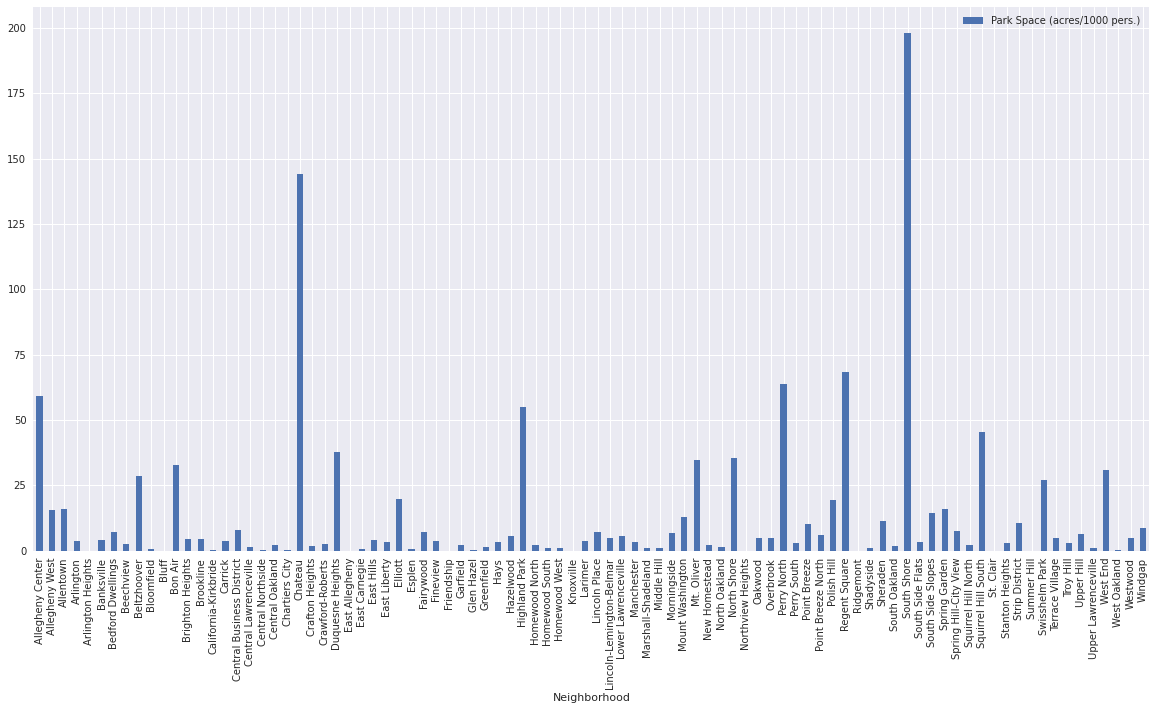

In [25]:
parkCounts = natural_data.groupby("Neighborhood").sum()["Park Space (acres/1000 pers.)"].to_frame().reset_index()
parkCounts.columns = ["Neighborhood", "Park Space (acres/1000 pers.)"]
parkCounts.plot(figsize= (20, 10), kind = "bar",x = "Neighborhood")

#### Finally, let's see what the concentration of park space in acres/1000 people looks like on a map.

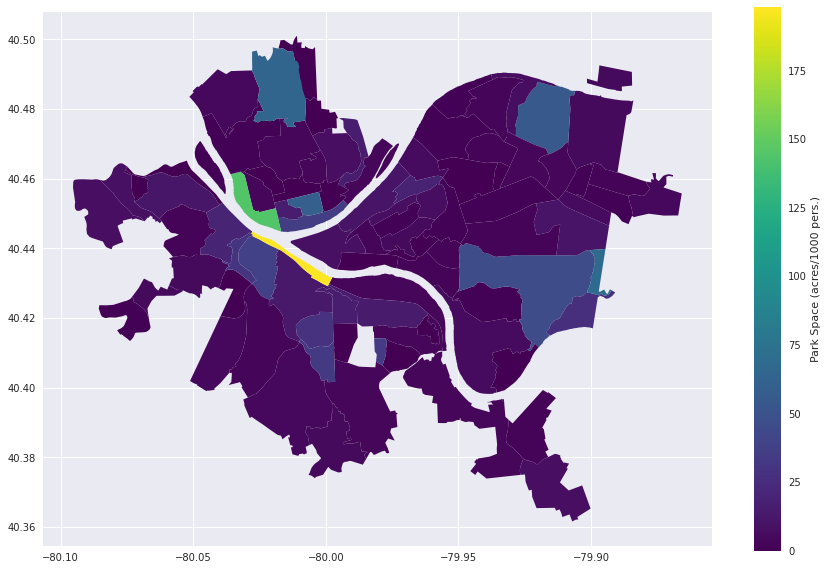

In [26]:
parkMap = neighborhoods.merge(parkCounts, how='left',left_on='hood',right_on='Neighborhood')
parkMap.plot(column = "Park Space (acres/1000 pers.)",
               cmap = "viridis",
               legend = True,
               figsize = (15,10),
               legend_kwds={'label':"Park Space (acres/1000 pers.)"})

#### Now, we're going to use the following equation to rank the neighborhoods and take a look at some of their scores.

In [27]:
maxParks = parkCounts.max()['Park Space (acres/1000 pers.)']
minParks = parkCounts.min()['Park Space (acres/1000 pers.)']
parkScores = parkCounts['Park Space (acres/1000 pers.)'].map(lambda x : ((x - minParks) / (maxParks - minParks)))
parkCounts['score'] = parkScores
parkCounts.head()

,Neighborhood,Park Space (acres/1000 pers.),score
0,Allegheny Center,59.2,0.298839
1,Allegheny West,15.5,0.078243
2,Allentown,15.8,0.079758
3,Arlington,3.6,0.018173
4,Arlington Heights,0.0,0.000000


# Final Scores

In [63]:
finalScores = pd.DataFrame(columns=['neighborhood', 'score'])
for index, row in treeCounts.iterrows():
    treeScore = row['score']
    
    try:
        wasteScore = data_filtered_count.loc[data_filtered_count['neighborhood'] == row["neighborhood"]]["score"].tolist()[0]
    except:
        wasteScore = 0
    
    parkScore = parkCounts.loc[parkCounts['Neighborhood'] == row["neighborhood"]]["score"].tolist()[0]
    
    finalScores.loc[index] = [row["neighborhood"], ((treeScore + wasteScore + parkScore)/3)]


### Top 5

In [64]:
finalScores.sort_values(by="score", ascending=False).head(5)

,neighborhood,score
76,Squirrel Hill South,0.465113
71,South Side Flats,0.449917
21,Chateau,0.371991
70,South Shore,0.333399
67,Shadyside,0.326568


### Bottom 5

In [62]:
finalScores.sort_values(by="score", ascending=True).head(5)

,neighborhood,score
4,Arlington Heights,0.000263
57,Northview Heights,0.000329
35,Glen Hazel,0.000402
77,St. Clair,0.000723
30,Esplen,0.001141


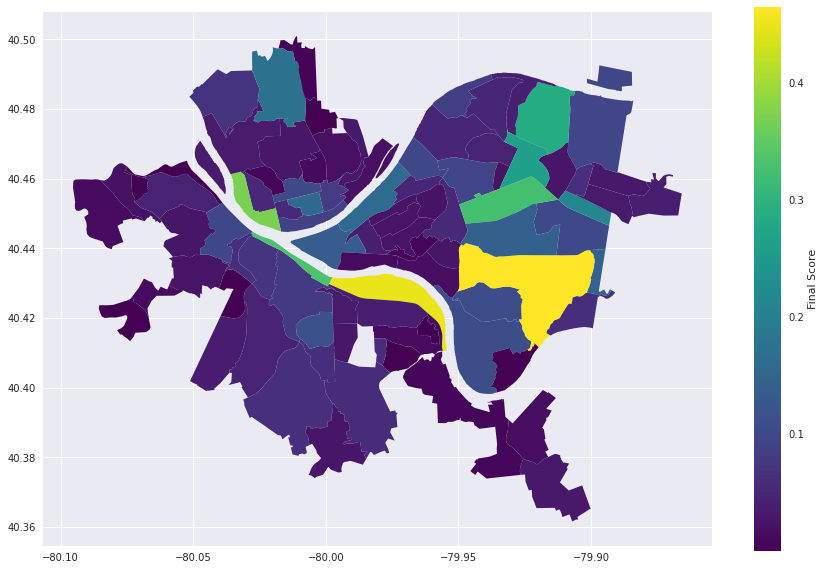

In [60]:
fullMap = neighborhoods.merge(finalScores, how='left', left_on='hood', right_on='neighborhood')
fullMap.plot(column="score",
             cmap="viridis",
             legend=True, 
             figsize=(15,10),
             legend_kwds={'label': "Final Score"})